# Analysis

Observation 1:<br>
>The average fare per ride appears to decrease as the population density increases (rural -> suburban -> urban). This could be due to many factors, but most likely is due to availability of drivers in densely populated areas. Whether it be competitors or other drivers within the company, there are more drivers availible in large population areas. This, in turn, creates an incentive for drivers to lower prices to be perceived as a good deal. Additionally, in densely populated areas there tends be more of a vertical spread vs a horizontal spread. This means that there is less distance to travel by car/bus/train/etc in between points of interest in people's lives. These factors, along with many others, could be strong influences on reasons why urban fares tend to be cheaper on average than any other area.<br>
<br>

Observation 2:<br>
>The data for the urban areas indicates that the market has reached a rough equilibrium. When considering factors such as availability (number of drivers) and cost, there tends to be a rough floor of ~\$19 and a ceiling of ~\$28 per ride. When compared to Suburban and Rural areas (~\$25 - ~\$37 and ~\$22 - ~\$43 respectively), the Urban market tends to be the most stable in price per fare. In contrast, the Rural areas see the greatest spread of prices. While it would follow logic that the ceiling would increase in rural areas due to decreased availability of drivers (lower driver counts); it does seem a bit puzzling that the floor for prices is lower than the suburban areas, and fairly close the the urban lows. Perhaps this is due to the frequency of rides being needed. Without a high demand, drivers could be unable to charge a substantial price without riders being unwilling to pay the price. Ultmitately, without more data, it is hard to draw a more definitive conclusion in this scenario.<br>
<br>

Observation 3:<br>
>It is interesting to note that even though, on average, the Urban areas tend to have a high driver count, there are still several towns classified as Urban that only see a very small number of total drivers in the town. Possible factors for this could be total popular of the city - a smaller city would have less of a demand for ride sharing companies while still allowing the relative low number of drives to keep up with demand in the city due to the short distances typical of city travel. Another factor may be the price and availibity of public transit in the city. Some local governments may have opted to build with an eye toward the future and built infastructure so that there are a multitude of options (light rails, metro rails, bus lines, ferries, barges, etc) for the public to use to access all parts of the city. This would cause a decrease in the demand for ride sharing companies to be present in the city in question. Once again, more data would be needed to be able to draw a better conclusion on this point.

<br>

In [1]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Setting up file pathing
file_name1 = os.path.join("Resources", "city_data.csv")
file_name2 = os.path.join("Resources", "ride_data.csv")
city_data = pd.read_csv(file_name1)
ride_data = pd.read_csv(file_name2)

# Merging data into one frame
merged_data_df = pd.merge(ride_data, city_data, on="city", how="outer")

# Bubble Plot of Ride Sharing Data

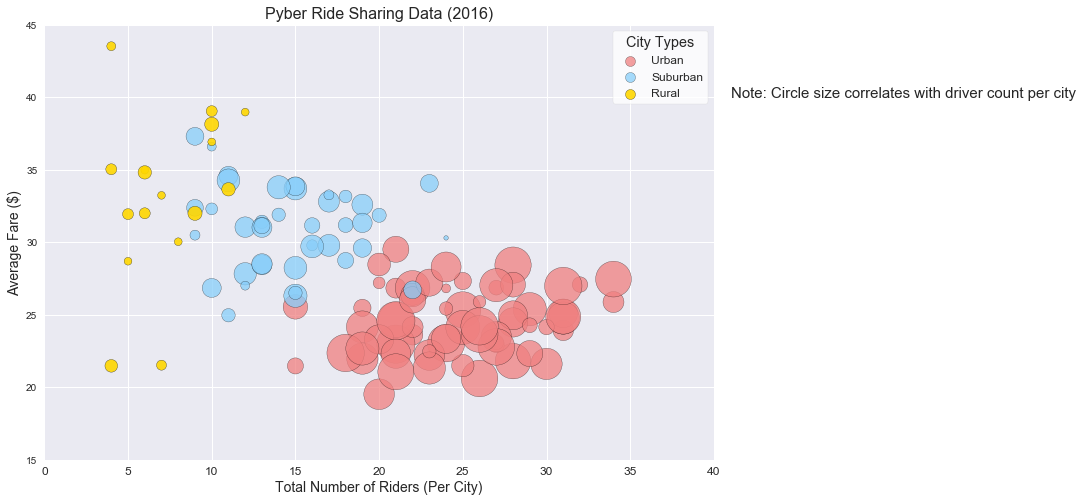

In [152]:
# Calculating important information

# Grabbing the mean of data needed and putting it in a DF
base_data_df = pd.DataFrame(merged_data_df.groupby('city')['fare','driver_count'].mean())

# Counting the total rides per city
rides_per_city_df = pd.DataFrame(merged_data_df['city'].groupby(merged_data_df['city']).count())
rides_per_city_df.columns = ['total_rides']

# Grabbing the type for each city
city_type_df = merged_data_df[['city','type']].copy()
city_type_df = city_type_df.drop_duplicates().sort_values('city')
city_type_df = city_type_df.set_index('city')

# Merging all of the data together into one DF
calc_ride_data_df = pd.merge(base_data_df, rides_per_city_df, right_index=True, left_index=True)
calc_ride_data_df = pd.merge(calc_ride_data_df, city_type_df, right_index=True, left_index=True)

# Cleaning city type DFs
rural_df = calc_ride_data_df[calc_ride_data_df['type'] == 'Rural']
urban_df = calc_ride_data_df[calc_ride_data_df['type'] == 'Urban']
suburban_df = calc_ride_data_df[calc_ride_data_df['type'] == 'Suburban']

# Building bubble plot
plt.figure(figsize=(12,8))

urban_scatter = plt.scatter(urban_df['total_rides'],urban_df['fare'] , marker="o", facecolors="lightcoral", edgecolors="black", \
            s=urban_df['driver_count']*20, alpha=0.75, label="Urban")

suburban_scatter = plt.scatter(suburban_df['total_rides'],suburban_df['fare'] , marker="o", c="lightskyblue", \
            edgecolors="black", s=suburban_df['driver_count']*20, alpha=0.75, label="Suburban")

rural_scatter = plt.scatter(rural_df['total_rides'], rural_df['fare'] , marker="o", c='gold', edgecolors="black", \
            s=rural_df['driver_count']*20, alpha=.9, label="Rural")

# Formatting the plot
plt.ylim(15, 45)
plt.xlim(0, 40)
plt.xlabel("Total Number of Riders (Per City)", fontsize=14)
plt.ylabel("Average Fare ($)", fontsize=14)
plt.title("Pyber Ride Sharing Data (2016)")
plt.text(41, 40, r'Note: Circle size correlates with driver count per city', fontsize=15)

# Formatting the legend
lgnd = plt.legend(loc="best", title='City Types', fontsize='large', frameon=True, facecolor='white')
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]
plt.setp(lgnd.get_title(),fontsize='x-large')

plt.show()

# Pie Charts for Data by City Type

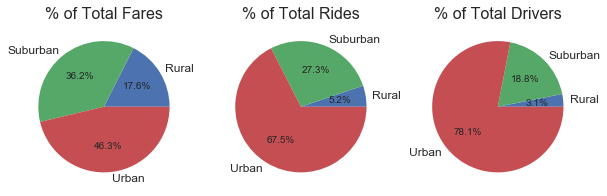

In [154]:
# Finding the sums for each city type
sum_fare_per_type_df = pd.DataFrame(calc_ride_data_df['fare'].groupby(calc_ride_data_df['type']).sum())
sum_rides_per_type_df = pd.DataFrame(calc_ride_data_df['total_rides'].groupby(calc_ride_data_df['type']).sum())
sum_drivers_per_type_df = pd.DataFrame(calc_ride_data_df['driver_count'].groupby(calc_ride_data_df['type']).sum())

# Merging sum DFs
sum_data_df = pd.merge(sum_fare_per_type_df, sum_rides_per_type_df, right_index=True, left_index=True)
sum_data_df = pd.merge(sum_data_df, sum_drivers_per_type_df, right_index=True, left_index=True)

# Setting up the Pie Plots, creating a grid space for the charts and setting formats
the_grid = GridSpec(1,3)
plt.style.use('seaborn')
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 16
explode = [0.1, 0, 0]

# Pie Chart 1 - Fares
plt.subplot(the_grid[0, 0], aspect=1)
fare_pie_chart = sum_data_df['fare'].plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
fare_pie_chart.set_ylabel('')
plt.title("% of Total Fares")

# Pie Chart 2 - Riders
plt.subplot(the_grid[0, 1], aspect=1)
riders_pie_chart = sum_data_df['total_rides'].plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
riders_pie_chart.set_ylabel('')
plt.title("% of Total Rides")

# Pie Chart 3 - Drivers
plt.subplot(the_grid[0, 2], aspect=1)
drivers_pie_chart = sum_data_df['driver_count'].plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
drivers_pie_chart.set_ylabel('')
plt.title("% of Total Drivers")

plt.show()